In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

def moving_average(data, window_size):
    return data.rolling(window=window_size).mean()

sub_folder = '../trained/'

window_size = 10

In [33]:
from matplotlib import rc

rc('text', usetex=True)
rc('font', **{'family': 'serif', 'serif': ['Times New Roman']})

In [34]:
os.getcwd()

'/home/jprodanov/resource-elastisity-nancy/code'

In [35]:
models = {
    'dqn/mdqn310ep1000m25inc2_rf_20rps5.0alpha1000res_double_dueling': 'Multi Agent DDDQN',
    'ddpg/221ep_2rf_20rps5.0alpha_50scale1000resources': 'Mutli Agent Granular DDPG',
    # 'ppo/66ep_rf_2_30rps8kepochs5alpha50scale_a0priority_newloading_instantscale_NOreseting_vari_res_pretrained': 'Multi Agent Instant PPO',
    'ppo/210ep_rf_2_20rps10kepochs5alpha10epupdate50scale_a_1000resources': 'Multi Agent Granular PPO',
}

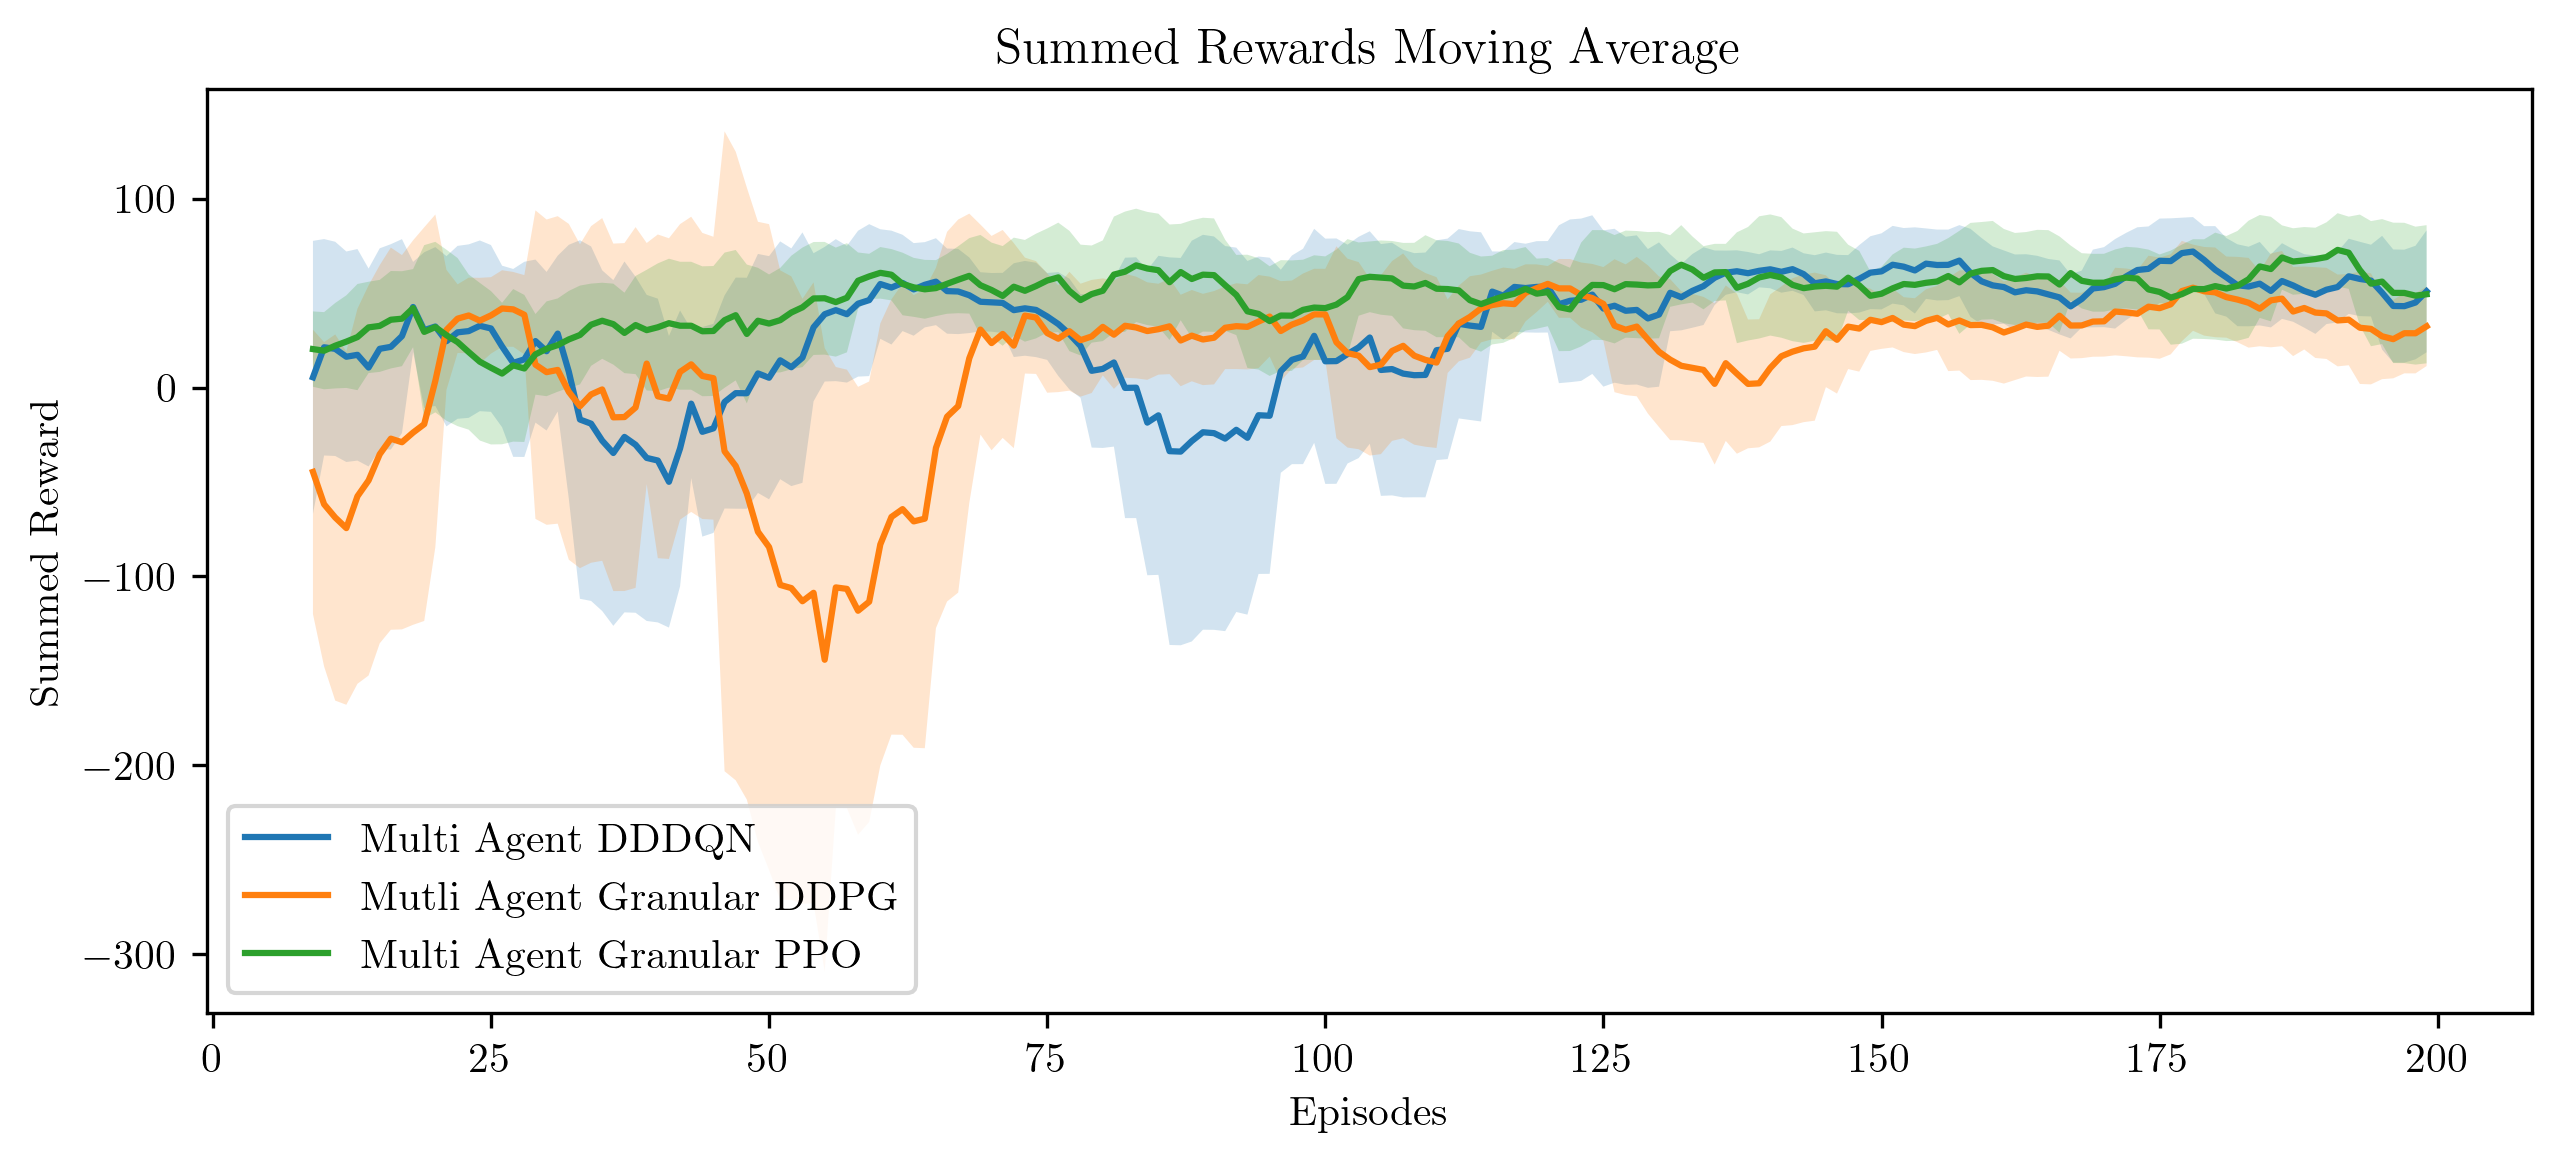

In [36]:
final_episode = 200

plt.figure(figsize=(10, 4), dpi=300)

for model_path, label in models.items():
    ep_summed_reward = pd.read_csv(sub_folder + model_path + '/ep_summed_rewards.csv')
    rewards = ep_summed_reward['Reward'][:200]
    moving_avg = moving_average(rewards, window_size)
    std_dev = rewards.rolling(window=window_size).std()

    plt.plot(moving_avg, label=label)

    plt.fill_between(range(len(rewards)), moving_avg - std_dev, moving_avg + std_dev, alpha=0.2)

plt.legend()
plt.xlabel('Episodes')
plt.ylabel('Summed Reward')
plt.title('Summed Rewards Moving Average')
plt.show()

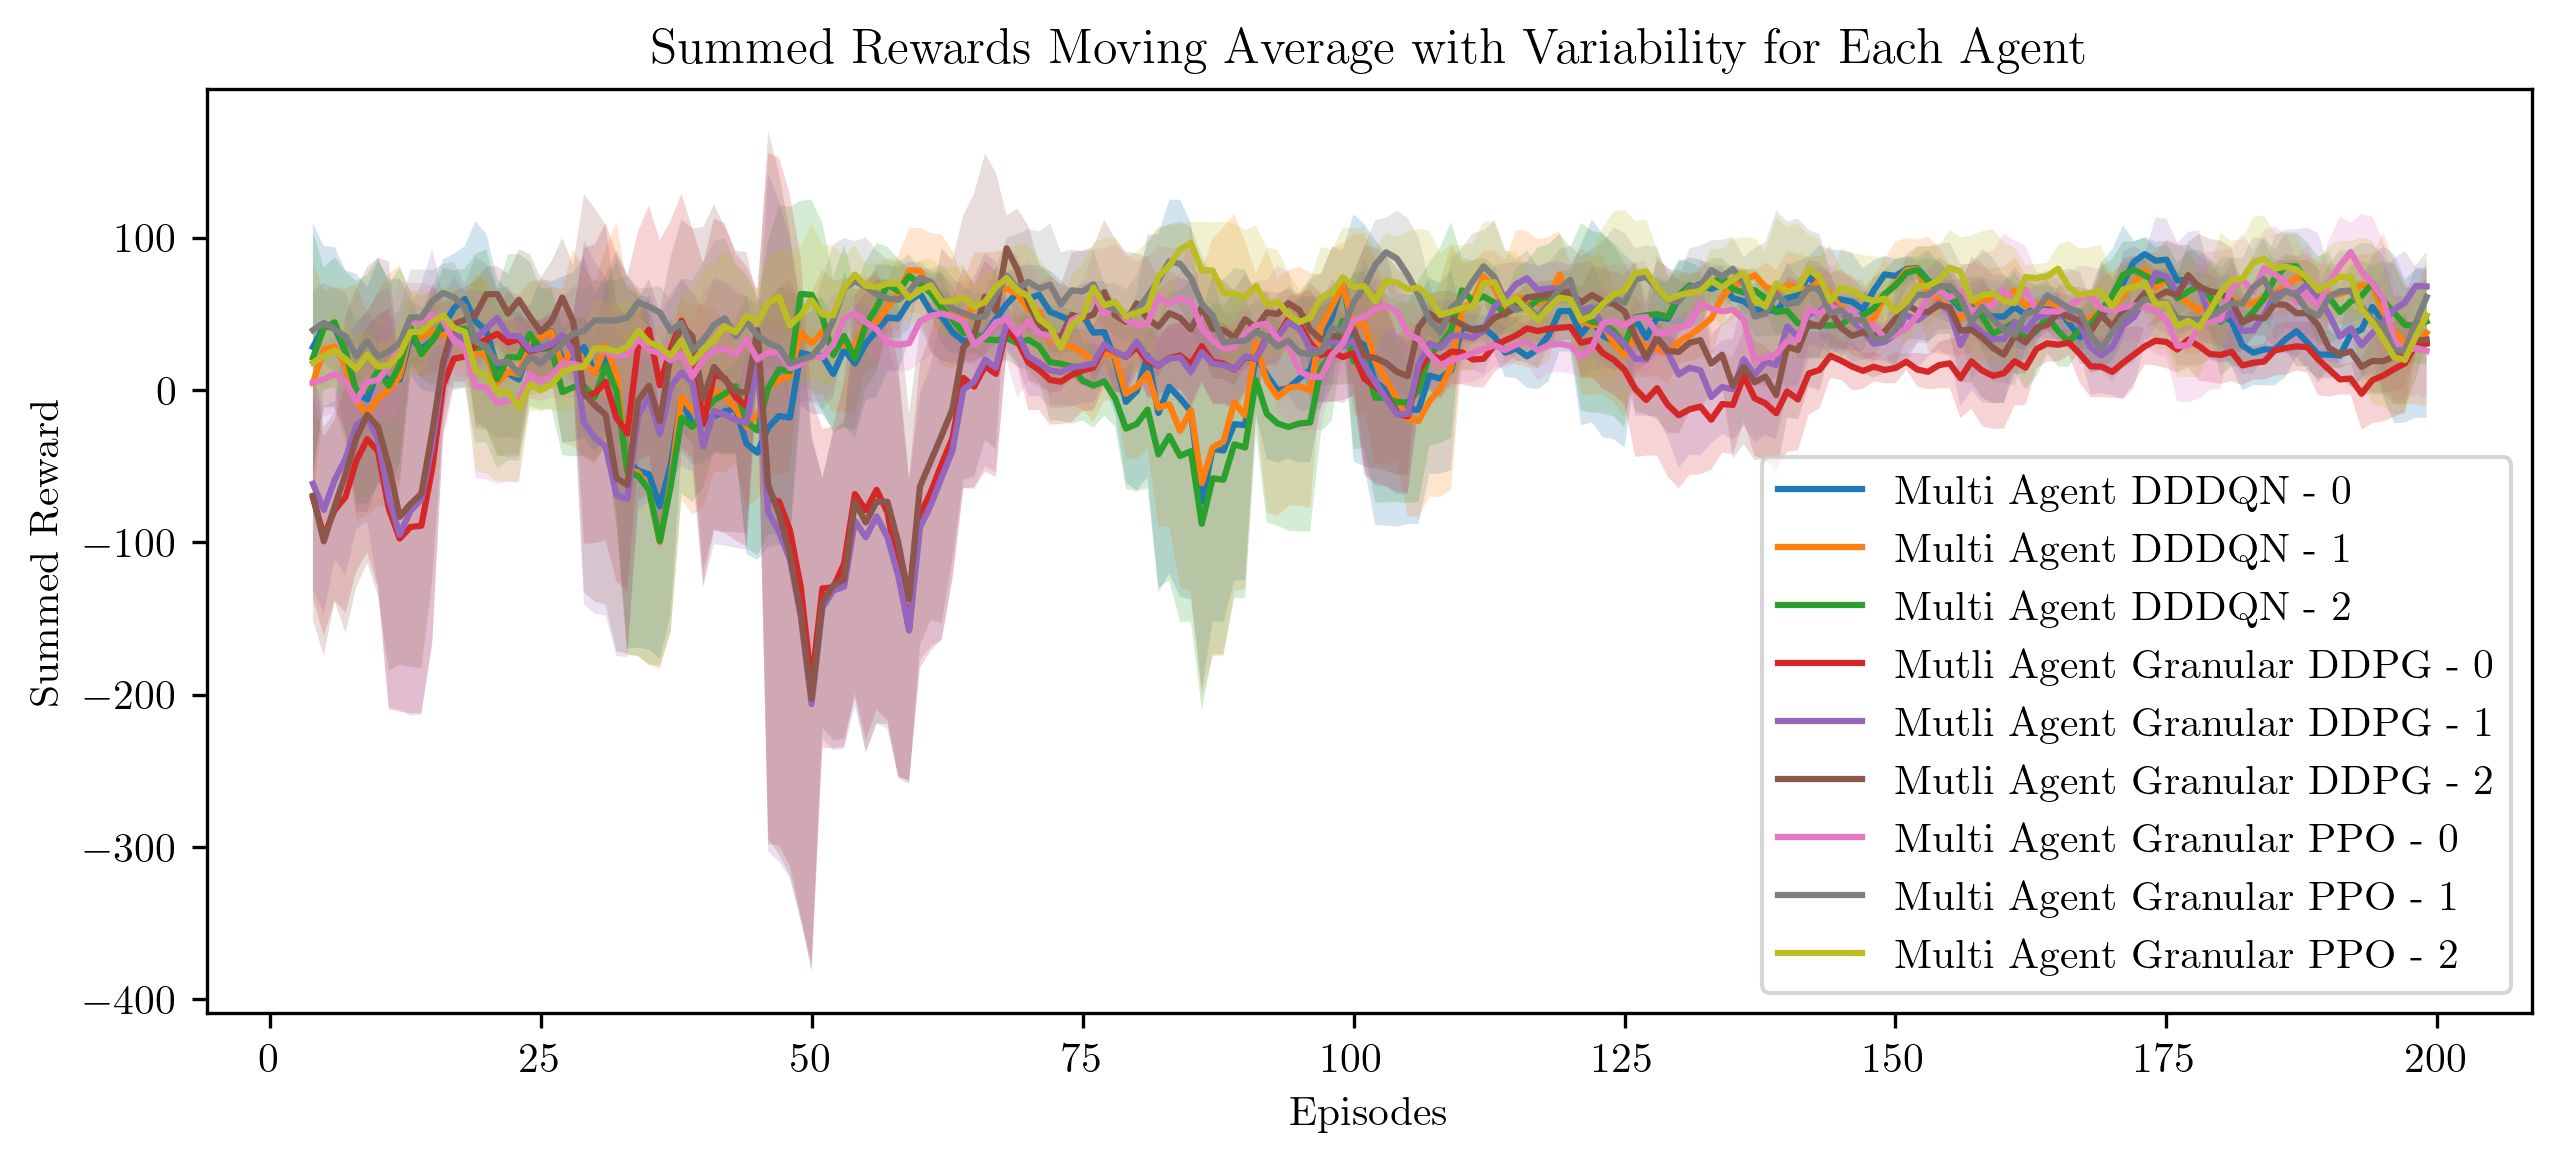

In [6]:
final_episode = 200
plt.figure(figsize=(10, 4), dpi=300)

num_agents = 3
agent_ep_summed_rewards = []
for model_path, label in models.items():
    for agent_idx in range(num_agents):
        agent_rewards_df = pd.read_csv(f'{sub_folder}{model_path}/agent_{agent_idx}_ep_summed_rewards.csv')
        agent_ep_summed_rewards.append(agent_rewards_df)

        rewards = agent_rewards_df['Reward'][:final_episode]

        moving_avg = moving_average(rewards, window_size)
        std_dev = rewards.rolling(window=window_size).std()

        plt.plot(moving_avg, label=f'{label} - {agent_idx}')
        plt.fill_between(range(len(rewards)), moving_avg - std_dev, moving_avg + std_dev, alpha=0.2)

plt.legend()
plt.xlabel('Episodes')
plt.ylabel('Summed Reward')
plt.title('Summed Rewards Moving Average with Variability for Each Agent')
plt.show()